In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['StudentsPerformance.csv']


In [12]:
data = pd.read_csv('../input/StudentsPerformance.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Cambiamos el nombre a las columnas para estandarizar:

In [14]:
#Renaming Columns
data.columns = ['gender', 'race', 'parentDegree', 'lunch', 'course', 'mathScore', 'readingScore', 'writingScore']

Buscamos si hay valores nulos

In [15]:
data.isna().sum()
#No hay valores nulos

gender          0
race            0
parentDegree    0
lunch           0
course          0
mathScore       0
readingScore    0
writingScore    0
dtype: int64

In [16]:
#Visualizamos los 10 primeros elementos
data.head(10)

,gender,race,parentDegree,lunch,course,mathScore,readingScore,writingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Mostramos la correlación de columnas

********

In [17]:
#Calculamos mínmos y máximos para cada cosa

print('Maxima puntuación en matemáticas: ',max(data['mathScore']))
print('Mínima puntuación en matemáticas: ',min(data['mathScore']))
print('Maxima puntuación en lectura: ',max(data['readingScore']))
print('Mínima puntuación en lectura: ',min(data['readingScore']))
print('Maxima puntuación en escritura: ',max(data['writingScore']))
print('Mínima puntuación en escritura: ',min(data['writingScore']))

Maxima puntuación en matemáticas:  100
Mínima puntuación en matemáticas:  0
Maxima puntuación en lectura:  100
Mínima puntuación en lectura:  17
Maxima puntuación en escritura:  100
Mínima puntuación en escritura:  10


In [18]:
#Calculamos el número de estudiantes que han lagrado máximos
print('Número de estudiantes que han sacado la máxima puntación en matemáticas: ', len(data[data['mathScore'] == 100]))
print('Número de estudiantes que han sacado la máxima puntación en lectura: ', len(data[data['readingScore'] == 100]))
print('Número de estudiantes que han sacado la máxima puntación en escritura: ', len(data[data['writingScore'] == 100]))

Número de estudiantes que han sacado la máxima puntación en matemáticas:  7
Número de estudiantes que han sacado la máxima puntación en lectura:  17
Número de estudiantes que han sacado la máxima puntación en escritura:  14


In [19]:
#Estudiantes que han logrado lo máximo en las tres categorías

perfect_writing = data['writingScore'] == 100
perfect_reading = data['readingScore'] == 100
perfect_math = data['mathScore'] == 100

perfect_score = data[(perfect_math) & (perfect_reading) & (perfect_writing)]
perfect_score

,gender,race,parentDegree,lunch,course,mathScore,readingScore,writingScore
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


In [20]:
print('Número de estudiantes que han sacado la máxima puntación en las tres áreas: ',len(perfect_score))

Número de estudiantes que han sacado la máxima puntación en las tres áreas:  3


In [21]:
#Numero de estudiantes que ha sacado el menor valor en las tres categorías
minimum_math = data['mathScore'] == 0
minimum_reading = data['readingScore'] == 17
minimum_writing = data['writingScore'] == 10



minimum_score = data[(minimum_math) & (minimum_reading) & (minimum_writing)]
minimum_score

,gender,race,parentDegree,lunch,course,mathScore,readingScore,writingScore
59,female,group C,some high school,free/reduced,none,0,17,10


In [23]:
print('Número de estudiantes que han sacado la mínima puntación en las tres áreas: ', len(minimum_score))

Número de estudiantes que han sacado la mínima puntación en las tres áreas:  1


In [24]:
#Agrupamos por raza y grado de estudios
data.groupby(['race','parentDegree']).mean()


mathScore  readingScore  writingScore
race    parentDegree                                             
group A associate's degree  61.000000     67.071429     63.571429
        bachelor's degree   67.166667     68.083333     68.333333
        high school         60.444444     62.888889     60.500000
        master's degree     57.666667     64.666667     67.666667
        some college        63.888889     65.777778     65.000000
        some high school    58.916667     62.083333     58.583333
group B associate's degree  66.097561     69.585366     68.243902
        bachelor's degree   69.300000     72.950000     71.650000
        high school         59.791667     63.458333     61.250000
        master's degree     67.166667     80.166667     77.166667
        some college        63.189189     65.756757     64.189189
        some high school    61.815789     66.447368     64.605263
group C associate's degree  66.730769     71.128205     70.269231
        bachelor's degree   68.150000     75.675000     75.900000
        high school         60.906250     64.421875     61.656250
        master's degree     67.052632     70.526316     69.526316
        some college        65.130435     69.420290     68.869565
        some high school    60.551020     65.632653     63.285714
group D associate's degree  67.600000     70.540000     69.860000
        bachelor's degree   67.571429     70.142857     71.892857
        high school         62.863636     64.409091     63.159091
        master's degree     72.521739     77.173913     79.739130
        some college        68.731343     70.880597     71.701493
        some high school    66.760000     69.980000     69.100000
group E associate's degree  74.897436     73.820513     73.205128
        bachelor's degree   76.555556     74.833333     75.388889
        high school         70.772727     70.318182     67.545455
        master's degree     74.625000     82.125000     80.500000
        some college        73.828571     72.628571     70.200000
        some high school    72.111111     69.555556     66.555556

In [26]:
#Analizamos la media por género
data.groupby(['gender']).mean()



#Parece que las chicas son mejores que los chicos ...

,mathScore,readingScore,writingScore
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [27]:
data.corr()
#Hay una fuerte correlación entre readingScore & writingScore, readingScore & mathScore and writingScore & mathScore

,mathScore,readingScore,writingScore
mathScore,1.000000,0.817580,0.802642
readingScore,0.817580,1.000000,0.954598
writingScore,0.802642,0.954598,1.000000


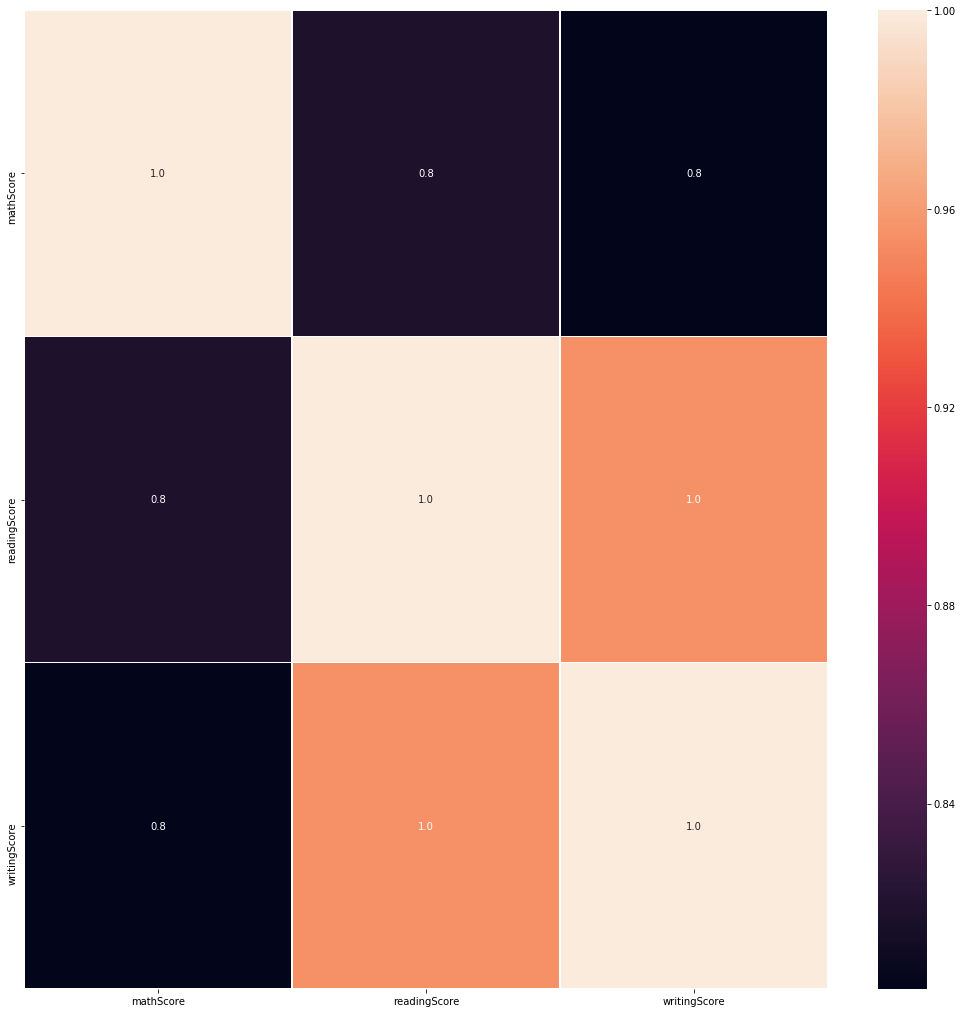

In [28]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [30]:
data.describe()

,mathScore,readingScore,writingScore
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


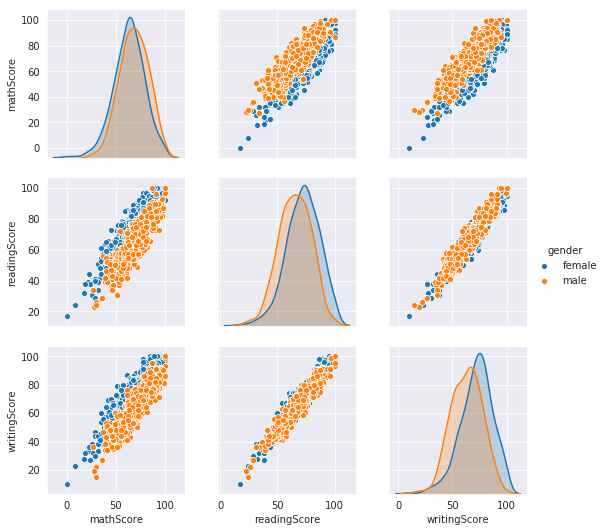

In [31]:
sns.set_style('darkgrid')

sns.pairplot(data, hue = 'gender')
plt.show()



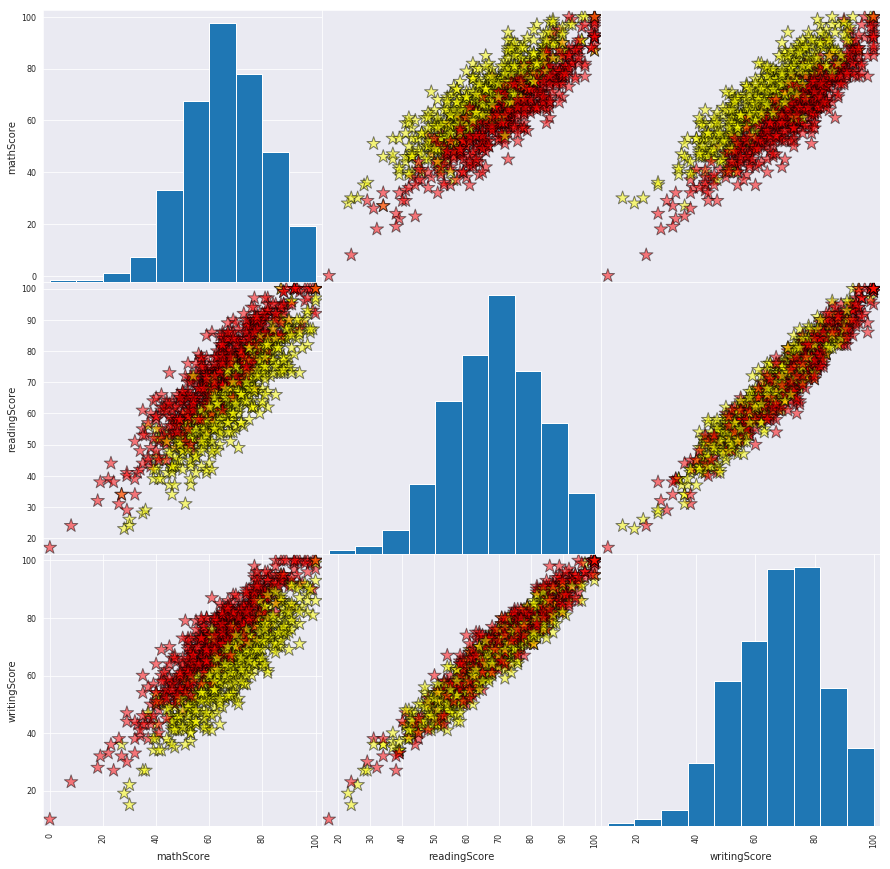

In [32]:



color_list = ['red' if i=='female' else 'yellow' for i in data.loc[:,'gender']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'gender'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

female    518
male      482
Name: gender, dtype: int64

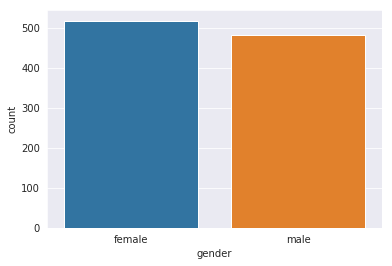

In [33]:
#Procentaje de chicos y de chicas

sns.countplot(x="gender", data=data)
data['gender'].value_counts()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


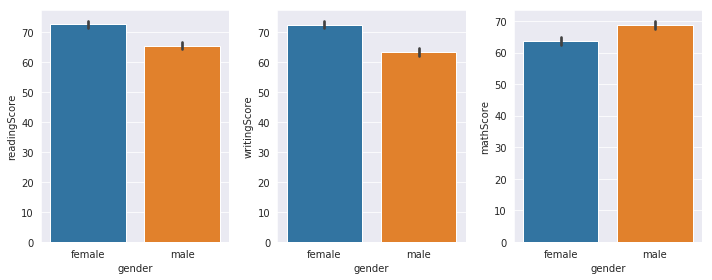

In [34]:


plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.barplot(x = 'gender', y = 'readingScore', data = data)

plt.subplot(1,3,2)
sns.barplot(x = 'gender', y = 'writingScore', data = data)

plt.subplot(1,3,3)
sns.barplot(x = 'gender', y = 'mathScore', data = data)

plt.tight_layout()


#Parace que a los chicos se les da mejor las matemáticas y a las chicas mejoran en lectura y en escritura

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


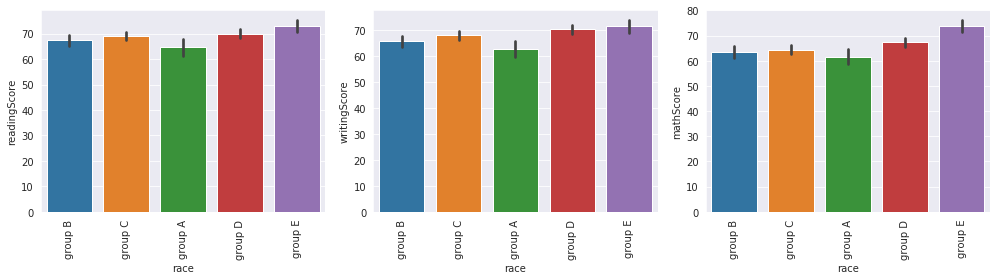

In [35]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'race', y = 'readingScore', data = data)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x = 'race', y = 'writingScore', data = data)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x = 'race', y = 'mathScore', data = data)
plt.xticks(rotation = 90)

plt.tight_layout()


In [36]:
data.parentDegree.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x = data.drop(['race', 'parentDegree', 'lunch', 'course', 'gender'], axis=1)
y= data['gender']
knn.fit(x,y)
prediction = knn.predict(x)
print('Predicción: {}'.format(prediction))

Predicción: ['female' 'female' 'female' 'male' 'male' 'female' 'female' 'male'
 'female' 'female' 'male' 'female' 'female' 'male' 'female' 'female'
 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'female'
 'female' 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'female'
 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'female'
 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'female'
 'female' 'male' 'female' 'male' 'female' 'female' 'female'

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('La precisión de nuestro modelo es: ',knn.score(x_test,y_test))

La precisión de nuestro modelo es:  0.875


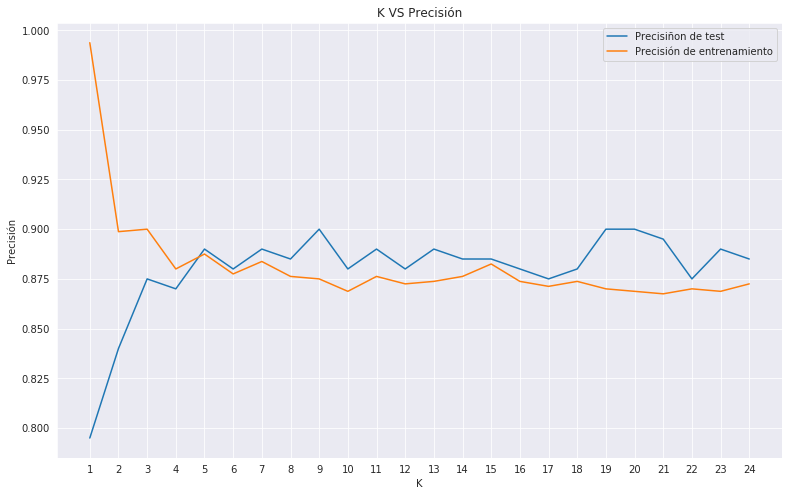

La mejor precisión que podemos obtener es 0.9 con K = 9


In [39]:
rg = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(rg):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[13,8])
plt.plot(rg, test_accuracy, label = 'Precisiñon de test')
plt.plot(rg, train_accuracy, label = 'Precisión de entrenamiento')
plt.legend()
plt.title('K VS Precisión')
plt.xlabel('K')
plt.ylabel('Precisión')
plt.xticks(rg)
plt.show()
print("La mejor precisión que podemos obtener es {} con K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

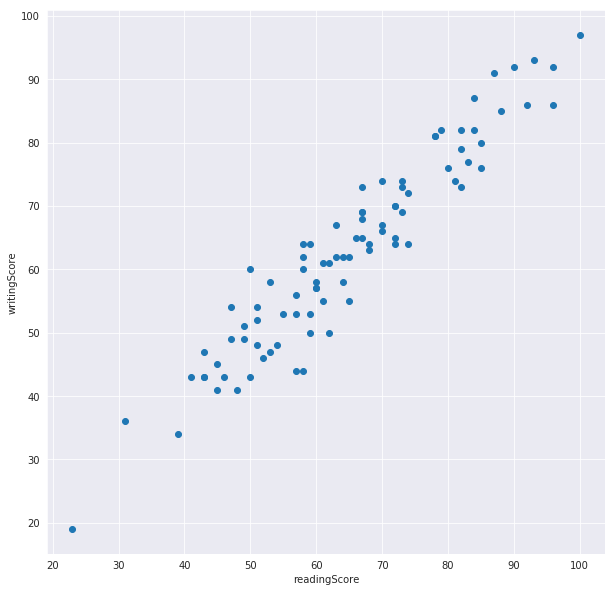

In [40]:
data1 = data[data['race'] =='group A']
x = np.array(data1.loc[:,'readingScore']).reshape(-1,1)
y = np.array(data1.loc[:,'writingScore']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('readingScore')
plt.ylabel('writingScore')
plt.show()

R^2 score:  0.9070104647322168


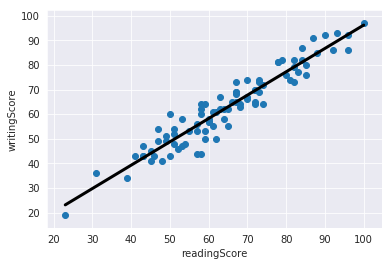

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
reg.fit(x,y)
predicted = reg.predict(predict_space)
print('R^2 score: ',reg.score(x, y))

plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('readingScore')
plt.ylabel('writingScore')
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


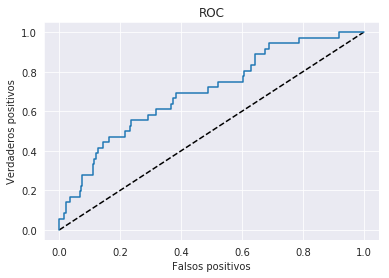

In [43]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

data['race_binary'] = [1 if i == 'group E' else 0 for i in data.loc[:,'race']]
x,y = data.loc[:,(data.columns != 'race') & (data.columns != 'race_binary')], data.loc[:,'race_binary']
x = x.drop(['gender', 'parentDegree', 'lunch', 'course'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('ROC')
plt.show()

La gráfica anterior está fatal!, no vamos a sacar mucho ya que lo valores de la línea azul debería aproximarse a uno y hacer como una L invertida.

In [44]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3)
knn_cv.fit(x,y)

# Print hyperparameter
print("Hiperparámetro K ajustado: {}".format(knn_cv.best_params_)) 
print("Mejor puntuación: {}".format(knn_cv.best_score_))

Hiperparámetro K ajustado: {'n_neighbors': 17}
Mejor puntuación: 0.863


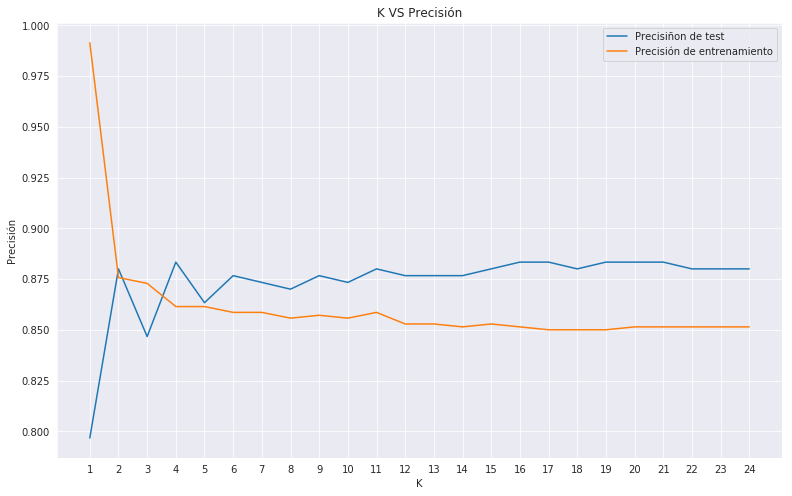

La mejor precisión que podemos obtener es 0.8833333333333333 con K = 4


In [45]:
rg = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(rg):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[13,8])
plt.plot(rg, test_accuracy, label = 'Precisiñon de test')
plt.plot(rg, train_accuracy, label = 'Precisión de entrenamiento')
plt.legend()
plt.title('K VS Precisión')
plt.xlabel('K')
plt.ylabel('Precisión')
plt.xticks(rg)
plt.show()
print("La mejor precisión que podemos obtener es {} con K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))